In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import functions as f

In [ ]:
plt.imshow(W_FF)
plt.colorbar()

def matrix_drift(x, matrix, means, var):

    for i in range(matrix.shape[1]):
        matrix[:, i] = ori_matrix(x, means[i], var)

    return matrix #, new_mean

def ori_matrix(x, mean, var):
    return stats.norm.pdf(x, mean, var) + stats.norm.pdf(x, mean+180, var) + stats.norm.pdf(x, mean-180, var) 


def OU_delta(x, mean, alpha, beta):
    delta_x = alpha * (mean - x) + beta * np.random.rand()
    return delta_x

fig, ax = plt.subplots(1, 5, dpi=200)

for i in range(100): 
    W_FF = matrix_drift(x, W_FF, means, W_FF_var)
    if i%20 == 0:
        ax[int(i/20)].imshow(W_FF)
        ax[int(i/20)].axis('off')



    
fig, ax = plt.subplots(figsize=(12, 3))
im = ax.imshow(E_total)
ax.set_ylabel('Neurons')
ax.set_xlabel('Time')
plt.colorbar(im, fraction=0.01, pad=0.04)

In [164]:
def nonlinearity(x):
    return 1/(1+np.exp(-x))

def get_input(N, theta):

    theta_y = np.linspace(0, 180, N)  # center of tuning curves 
    d = np.abs(theta - theta_y)    # distance to input theta
    sigma = 10  #* 2*np.pi     # response width
    amp = 80                   # response amplitude

    y = amp * np.exp(-(d**2)/(2*sigma**2))

    return y

def simulate(N, W_EE, W_EI, W_IE, W_FF, W_FF_var, E_init, mean_init, input, T, delta_t=0.1, tau=1):

    timesteps = int(T / delta_t)
    E = np.zeros((N, timesteps))    
    E[:, 0] = E_init                # initialise E activations
    I = np.ones((N, timesteps))     # initialise I activations

    for i in range(timesteps - 1):

        # W_FF, mean = matrix_drift(x, W_FF, mean, W_FF_var)
        
        E[:, i + 1] = E[:, i] + delta_t * (
            - E[:, i] 
            + np.dot(W_EE, nonlinearity(E[:, i]))
            - np.dot(W_EI, nonlinearity(I[:, i]))
            + np.dot(W_FF, input)
        ) / tau

        # I[:, i + 1] = I[:, i] + delta_t * (
        #     - I[:, i] 
        #     + np.dot(W_IE, nonlinearity(E[:, i]))
        # ) / tau

    return E


In [162]:
N = int(180)   # number of neurons per layer
T = 100

E_init = np.random.normal(0, 1, size=N)   # initial E activations
I_init = np.random.normal(0, 1, size=N)   # initial I activations

W_FF = np.zeros((N, N))      # feedforward weights
W_EE = np.zeros((N, N))      # recurrent weights

# W_EI = np.zeros((N, N))    # I -> E weights
# W_IE = np.zeros((N, N))

W_EI = np.ones((N, N)) - 0.9   # I -> E weights
# W_IE = np.ones((N, N))        # E -> I weights

x = np.linspace(0, 180, N)
W_FF_var = 20                 # variance of feedforward weights
W_EE_var = 20                  # variance of recurrent weights
W_IE_var = 20
W_EI_var = 20

x = np.linspace(0, 180, N)
mean_init = np.zeros(N)

for i in range(N):
    W_FF[:, i] += ori_matrix(x, x[i], W_FF_var)
    W_EE[:, i] += ori_matrix(x, x[i], W_EE_var)
    mean_init[i] = x[i]
    # W_IE[:, i] += (stats.norm.pdf(x, x[i], W_IE_var) + stats.norm.pdf(x, x[i]+180, W_IE_var) + stats.norm.pdf(x, x[i]-180, W_IE_var) )
    # W_EI[:, i] += (stats.norm.pdf(x, x[i], W_EI_var) + stats.norm.pdf(x, x[i]+180, W_EI_var) + stats.norm.pdf(x, x[i]-180, W_EI_var) )


theta = 40     
input = get_input(N, theta)   # gaussian bump centred on theta



In [198]:
T = 10

E_total = []
E_final = []


angles = np.arange(0, 180, 10)

for theta in angles:
    sim = simulate(N, W_EE, W_EI, W_IE, W_FF, W_FF_var, E_init, mean_init, get_input(N, theta), T)
    E_total.append(sim)
    E_final.append(sim[:, -1][None])
    

In [199]:
np.concatenate(E_result, axis=1).shape

(180, 1800)

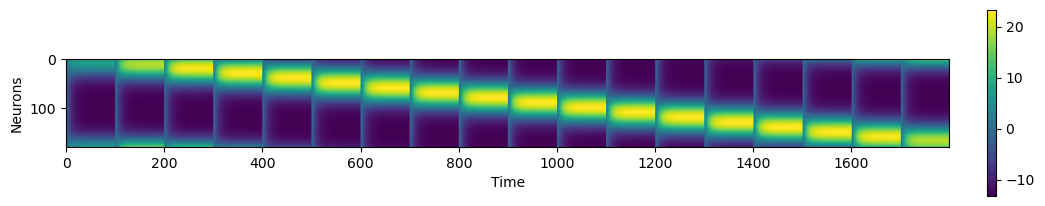

In [200]:
# E_result = simulate(N, W_EE, W_EI, W_IE, W_FF, W_FF_var, E_init, mean_init, input, T)

fig, ax = plt.subplots(figsize=(12, 3))
# im = ax.imshow(nonlinearity(E_result))
im = ax.imshow(np.concatenate(E_total, axis=1))
ax.set_ylabel('Neurons')
ax.set_xlabel('Time')
plt.colorbar(im, fraction=0.01, pad=0.04)


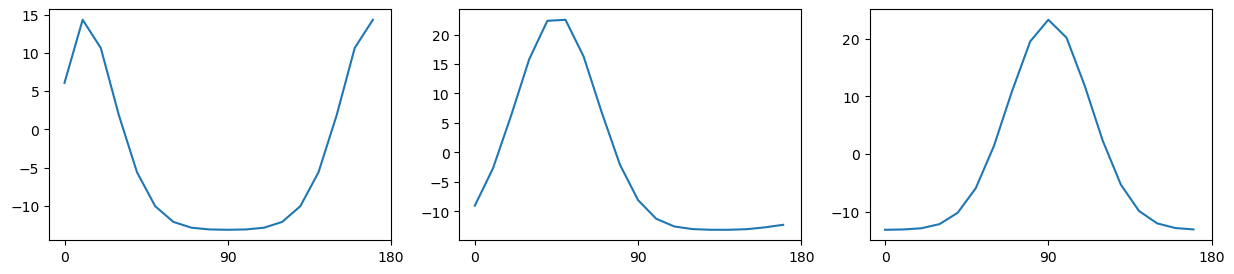

In [218]:
tunings = np.concatenate(E_final, axis=0).T

fig, axs = plt.subplots(1, 3, figsize=(15, 3))

axs[0].plot(angles, tunings[0, :])
axs[1].plot(angles, tunings[45, :])
axs[2].plot(angles, tunings[90, :])

for ax in axs:
    ax.set_xticks([0, 90, 180])
    ax.set_xticklabels([0, 90, 180])





In [196]:
tunings.shape

(180, 18)